# Collecting Image

In [1]:
import os
import pandas as pd
from keras.models import load_model
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [2]:
model_path = os.path.join('models', 'model.h5')
model = load_model(model_path)

In [3]:
song_dataset = pd.read_csv(os.path.join('data', 'song_moods.csv'))
song_dataset = song_dataset[['name', 'artist', 'mood']]
song_dataset.head()

,name,artist,mood
0,1999,Prince,Happy
1,23,Blonde Redhead,Sad
2,9 Crimes,Damien Rice,Sad
3,99 Luftballons,Nena,Happy
4,A Boy Brushed Red Living In Black And White,Underoath,Energetic


In [4]:
import time

In [5]:
#'''
cap = cv2.VideoCapture(0)

time.sleep(3)
print('Collecting test image')
ret, frame = cap.read()
imgname = os.path.join('collectedImages', 'test_image6.jpg')
cv2.imwrite(imgname, frame)
cv2.imshow('frame', frame)

cap.release()
cv2.destroyAllWindows()
#'''

In [6]:
test_img_dir = os.path.join('collectedImages', 'test_image6.jpg')

In [7]:
img = cv2.imread(test_img_dir)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

haarscascade_dir = os.path.join('haarscascade', 'haarcascade_frontalface_alt2.xml')
face_cascade = cv2.CascadeClassifier(haarscascade_dir)
faces = face_cascade.detectMultiScale(gray, 1.1, 4)

for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 2)
    faces = img[y:y + h, x:x + w]
    cv2.imshow("Cropped", faces)
    cv2.imwrite(os.path.join('collectedImages', 'cropped', 'test_cropped.jpg'), faces)

cv2.imshow('Cropped Image', img)
cv2.waitKey()

-1

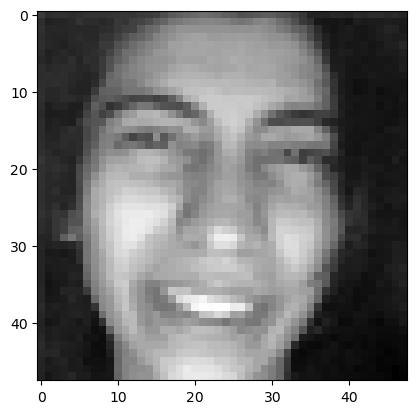

In [8]:
cropped_test_img_dir = os.path.join('collectedImages', 'cropped', 'test_cropped.jpg')
test_image = cv2.imread(cropped_test_img_dir, cv2.IMREAD_GRAYSCALE)
test_image = cv2.resize(test_image, (48, 48))
plt.imshow(test_image, cmap='gray')
plt.show()

In [9]:
test_img = np.array(test_image)
test_img = test_img.reshape(1, 48, 48, 1)

In [10]:
def mood_from_label(label):
    labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
    return labels[label]

In [11]:
predict_x = model.predict(test_img)
result = np.argmax(predict_x, axis=1)
print(mood_from_label(result[0]))

1/1 [==============================] - 0s 129ms/step
happy


In [12]:
mood_label = result[0]
mood = mood_from_label(result[0])

print(mood_label, mood)

3 happy


# Recommending Song List

In [13]:
def find_song_mood(label):
    if (label == 0 or label == 1 or label == 2):
        return 'Calm'
    elif (label == 3 or label == 4):
        return 'Happy'
    elif (label == 5):
        return 'Sad'
    elif (label == 6):
        return 'Energetic'

In [14]:
song_mood = song_dataset['mood'] == find_song_mood(mood_label)

temp = song_dataset.where(song_mood)
temp = temp.dropna()
songs = temp.sample(n=5)
songs.reset_index(inplace=True)
display(songs)

,index,name,artist,mood
0,114,Crazy,Gnarls Barkley,Happy
1,434,Pumped Up Kicks,Foster The People,Happy
2,146,Don't Stop Me Now - 2011 Mix,Queen,Happy
3,321,"Lola - Live at Providence Civic Center, Provid...",The Kinks,Happy
4,594,Underwater - Tinlicker Remix,Gabriel & Dresden,Happy
